In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [56]:
flame = pd.read_csv("data/FireBox-flameAnalogRead.csv", index_col='time')
gas = pd.read_csv("data/FireBox-gasAnalogRead.csv", index_col='time')
humi = pd.read_csv("data/FireBox-humi.csv", index_col='time')
temp = pd.read_csv("data/FireBox-temp.csv", index_col='time')
pres = pd.read_csv("data/FireBox-presence.csv", index_col='time')
pres2 = pd.read_csv("data/FireBox-presenceV2.csv", index_col='time')

dfs = [flame, gas, humi, temp, pres, pres2]

start = pd.to_datetime('2025-05-05 00:00').tz_localize('UTC')
end   = pd.to_datetime('2025-05-19 00:00').tz_localize('UTC')

for i, df in enumerate(dfs):
    # df = df.copy()
    df.index = pd.to_datetime(df.index, utc=True).round('s')
    dfs[i]  = df.loc[(df.index >= start) & (df.index <= end)]

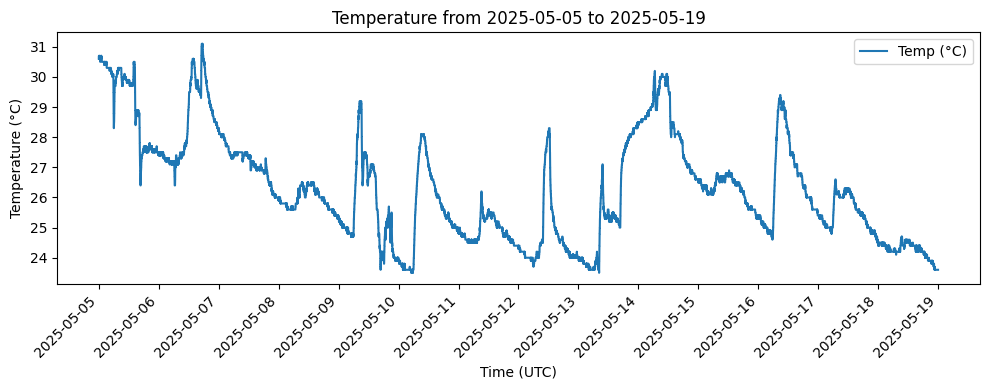

In [57]:
temp = dfs[3]
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(temp.index, temp['value'], label='Temp (°C)')

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature from 2025-05-05 to 2025-05-19')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend()
plt.tight_layout()
plt.show()
